# <center> E-Commerce Clothing Review Classification with TF

# Aim of the Notebook

**Hello, welcome to this Notebook!**

**In this notebook, I will be working on the Women's E-Commerce Clothing Review dataset.**

**First of all, I will make some exploratory data analysis for the features and the texts as well. And then, I will clean the text data using by NLTK library.**

**For the next step, I will create an ANN model to achieve my aim.**

**I am open to feedback and suggestions, feel free to comment your feedback and suggestions on the comment section or contact me.**

**So, let's get started!**

# Importing the Libraries

In [1]:
import os
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import plotly.graph_objects as go
#from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
import numpy as np
import re
import plotly.express as px
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.layers import Dense, Dropout
from keras.layers import LSTM
from keras.models import Sequential
from keras.layers import Bidirectional
from keras.layers import Embedding
from keras.layers import GlobalAvgPool1D
import tensorflow as tf

In [2]:
#pip install tensorflow

In [4]:
data = pd.read_excel("Output Womens Clothing E-Commerce Reviews.xlsx" , index_col=0)
data.head()

Clothing ID                                        Review Text  Rating  \
96           861  i am in need of easy comfortable tops for ever...       3   
123         1133  i read the previous reviews and had hoped that...       4   
240          872  this is exactly what i was expecting cute comf...       5   
276         1104  this dress is gorgeous i love it i bought it t...       5   
310          836  love this top made with 100 cotton a vintage l...       5   

     Recommended IND Category name Sentiment Size Material Longevity Color  \
96                 0         Knits   Neutral  POS      POS       NaN   POS   
123                1       Jackets  Positive  POS      POS       NaN   POS   
240                1         Knits  Positive  NaN      POS       NaN   POS   
276                1       Dresses  Positive  NaN      POS       NaN   POS   
310                1          Tops  Positive  POS      NaN       NaN   POS   

    General Comfort  
96      NaN     POS  
123     NaN     POS  
240     NaN     POS  
276     NaN     POS  
310     NaN     POS

**As you can see from the head of the dataset, we have some unnecessary features such as Clothing ID, Title. First of all, I will drop this features.**

In [5]:
data = data.drop(['Clothing ID'], axis=1)
data.head()

Review Text  Rating  \
96   i am in need of easy comfortable tops for ever...       3   
123  i read the previous reviews and had hoped that...       4   
240  this is exactly what i was expecting cute comf...       5   
276  this dress is gorgeous i love it i bought it t...       5   
310  love this top made with 100 cotton a vintage l...       5   

     Recommended IND Category name Sentiment Size Material Longevity Color  \
96                 0         Knits   Neutral  POS      POS       NaN   POS   
123                1       Jackets  Positive  POS      POS       NaN   POS   
240                1         Knits  Positive  NaN      POS       NaN   POS   
276                1       Dresses  Positive  NaN      POS       NaN   POS   
310                1          Tops  Positive  POS      NaN       NaN   POS   

    General Comfort  
96      NaN     POS  
123     NaN     POS  
240     NaN     POS  
276     NaN     POS  
310     NaN     POS

In [6]:
# Checking for the missing values
count_NaN = data.isna().sum()
count_NaN

Review Text          826
Rating                 0
Recommended IND        0
Category name          0
Sentiment              0
Size               19982
Material           20764
Longevity          23410
Color              20534
General            23165
Comfort            22906
dtype: int64

**It is impossible to replace the Review Text features. Therefore, I will drop the missing rows from the dataset.**

**It looks better now!**

# Distribution of the Ratings

In [7]:
fig = px.histogram(data['Rating'],
                   labels={'value': 'Rating',
                           'count': 'Frequency',
                           'color': 'Rating'}, color=data['Rating'])
fig.update_layout(bargap=0.2)
fig.update_traces(marker=dict(line=dict(color='#000000', width=2)))
fig.update_layout(title_text='Distribution of the Ratings',
                  title_x=0.5, title_font=dict(size=20))
fig.show()

**According to the graph above, frequency of the Rating 5 is pretty high compared to the others.**

# Distribution of the Age of the Customers

In [8]:
fig = px.histogram(data['Age'], marginal='box',
                   labels={'value': 'Age'})

fig.update_traces(marker=dict(line=dict(color='#000000', width=2)))
fig.update_layout(title_text='Distribution of the Age of the Customers',
                  title_x=0.5, title_font=dict(size=20))
fig.show()

KeyError: 'Age'

**As you can see from the 'Distribution of the Age of the Customers' graph, the age of the customers is usually distributed between 34 and 52. We have outliers that customers older than 80.**

# Distribution of the Recommendations

In [9]:
labels = ['Recommended', 'Not Recommended']
values = [data[data['Recommended IND'] == 1]['Recommended IND'].value_counts()[1],
          data[data['Recommended IND'] == 0]['Recommended IND'].value_counts()[0]]
colors = ['green', 'red']

fig = go.Figure(data=[go.Pie(labels=labels, values=values, opacity=0.8)])
fig.update_traces(textinfo='percent+label', marker=dict(line=dict(color='#000000', width=2), colors=colors))
fig.update_layout(title_text='Distribution of the Recommendations', title_x=0.5, title_font=dict(size=20))
fig.show()

**According to this pie chart, the most of the sales are Recommended.**

# Distribution of the Age and Recommendation

In [10]:
fig = px.histogram(data['Age'], color=data['Recommended IND'],
                   labels={'value': 'Age',
                           'color': 'Recommended'}, marginal='box')
fig.update_traces(marker=dict(line=dict(color='#000000', width=2)))
fig.update_layout(title_text='Distribution of the Age and Recommendation',
                  title_x=0.5, title_font=dict(size=20))
fig.update_layout(barmode='overlay')
fig.show()

KeyError: 'Age'

# Relationship between Ratings and Recommendation

In [11]:
fig = px.histogram(data['Rating'], color=data['Recommended IND'],
                   labels={'value': 'Rating',
                           'color': 'Recommended?'})
fig.update_layout(bargap=0.2)
fig.update_traces(marker=dict(line=dict(color='#000000', width=2)))
fig.update_layout(title_text='Relationship between Ratings and Recommendation',
                  title_x=0.5, title_font=dict(size=20))
fig.update_layout(barmode='group')
fig.show()

**According to this graph above, almost all the Rating 5 and Rating 4 data points are recommended.**

**In addition, Rating 1 and Rating 2 data points have almost no recommendations.**

**For the further steps, I would create a common rating point with the Rating 4 and Rating 5 as well as Rating 1 and Rating 2. In this way, I would shrink the labels therefore, the model would perform better.**

# Relationship between Ratings and Departments

In [12]:
fig = px.histogram(data['Rating'], color=data['Department Name'],
                   labels={'value': 'Rating',
                           'color': 'Department Name'})
fig.update_layout(bargap=0.2)
fig.update_traces(marker=dict(line=dict(color='#000000', width=2)))
fig.update_layout(title_text='Relationship between Ratings and Departments',
                  title_x=0.5, title_font=dict(size=20))
fig.update_layout(barmode='group')
fig.show()

KeyError: 'Department Name'

**According to the graph above, Tops and Dresses have the most of the rating points. Trend and Jackets have the least.**

# Department and Recommendation Distribution

In [13]:
fig = px.histogram(data['Department Name'], color=data['Recommended IND'],
                   labels={'value': 'Department Name',
                           'color': 'Recommended?'})
fig.update_layout(bargap=0.2)
fig.update_traces(marker=dict(line=dict(color='#000000', width=2)))
fig.update_layout(title_text='Department Name and Recommendation Distribution',
                  title_x=0.5, title_font=dict(size=20))
fig.update_layout(barmode='group')
fig.show()

KeyError: 'Department Name'

# Division and Recommendation Distribution


In [14]:
fig = px.histogram(data['Division Name'], color=data['Recommended IND'],
                   labels={'value': 'Division Name',
                           'color': 'Recommended?'})
fig.update_layout(bargap=0.2)
fig.update_traces(marker=dict(line=dict(color='#000000', width=2)))
fig.update_layout(title_text='Division Name and Recommendation Distribution',
                  title_x=0.5, title_font=dict(size=20))
fig.update_layout(barmode='group')
fig.show()

KeyError: 'Division Name'

# Distribution of the Length of the Texts

In [15]:
data['length_of_text'] = [len(i.split(' ')) for i in data['Review Text']]
fig = px.histogram(data['length_of_text'], marginal='box',
                   labels={"value": "Length of the Text",
                           "color": 'Recommended'},
                   color=data['Recommended IND'])

fig.update_traces(marker=dict(line=dict(color='#000000', width=2)))
fig.update_layout(title_text='Distribution of the Length of the Texts',
                  title_x=0.5, title_font=dict(size=20))
fig.update_layout(barmode='overlay')
fig.show()

AttributeError: 'float' object has no attribute 'split'

**As you can see from the figure above, Recommended and not Recommended products almost have the same distribution length of text.**

# Top Frequent 200 Words in the Dataset (Before Cleaning)

In [16]:
FreqOfWords = data['Review Text'].str.split(expand=True).stack().value_counts()
FreqOfWords_top200 = FreqOfWords[:200]

fig = px.treemap(FreqOfWords_top200, path=[FreqOfWords_top200.index], values=0)
fig.update_layout(title_text='Top Frequent 200 Words in the Dataset (Before Cleaning)',
                  title_x=0.5, title_font=dict(size=20)
                  )
fig.update_traces(textinfo="label+value")
fig.show()

**According to this Treemap above, the top frequent 200 words usually include a stopword. For the further step of this notebook, I will remove them from the text.**

# <center> Data Preprocessing

**In this step I will be dealing with the cleaning text data.**

In [17]:
# Lower Character all the Texts
data['Review Text'] = data['Review Text'].str.lower()
data['Review Text'].head()

96     i am in need of easy comfortable tops for ever...
123    i read the previous reviews and had hoped that...
240    this is exactly what i was expecting cute comf...
276    this dress is gorgeous i love it i bought it t...
310    love this top made with 100 cotton a vintage l...
Name: Review Text, dtype: object

In [18]:
# Removing Punctuations and Numbers from the Text
def remove_punctuations_numbers(inputs):
    return re.sub(r'[^a-zA-Z]', ' ', inputs)


data['Review Text'] = data['Review Text'].apply(remove_punctuations_numbers)

TypeError: expected string or bytes-like object

**In this section, I will remove all punctuations and numbers from the all dataframe. They will be not usefull for my model training.**

# Tokenizing with NLTK

In [27]:
def tokenization(inputs):  # Ref.1
    return word_tokenize(inputs)


data['text_tokenized'] = data['Review Text'].apply(tokenization)
data['text_tokenized'].head()

0    [absolutely, wonderful, silky, and, sexy, and,...
1    [love, this, dress, it, s, sooo, pretty, i, ha...
2    [i, had, such, high, hopes, for, this, dress, ...
3    [i, love, love, love, this, jumpsuit, it, s, f...
4    [this, shirt, is, very, flattering, to, all, d...
Name: text_tokenized, dtype: object

**Tokenizing with NLTK will help me to clean the dataset for better model training.**

# Stopwords Removal

In [19]:
stop_words = set(stopwords.words('english'))
stop_words.remove('not')


def stopwords_remove(inputs):  # Ref.2
    return [k for k in inputs if k not in stop_words]


data['text_stop'] = data['text_tokenized'].apply(stopwords_remove)
data['text_stop'].head()

0    [absolutely, wonderful, silky, sexy, comfortable]
1    [love, dress, sooo, pretty, happened, find, st...
2    [high, hopes, dress, really, wanted, work, ini...
3    [love, love, love, jumpsuit, fun, flirty, fabu...
4    [shirt, flattering, due, adjustable, front, ti...
Name: text_stop, dtype: object

# Lemmatization

In [20]:
lemmatizer = WordNetLemmatizer()


def lemmatization(inputs):  # Ref.1
    return [lemmatizer.lemmatize(word=kk, pos='v') for kk in inputs]


data['text_lemmatized'] = data['text_stop'].apply(lemmatization)
data['text_lemmatized'].head()

0    [absolutely, wonderful, silky, sexy, comfortable]
1    [love, dress, sooo, pretty, happen, find, stor...
2    [high, hop, dress, really, want, work, initial...
3    [love, love, love, jumpsuit, fun, flirty, fabu...
4    [shirt, flatter, due, adjustable, front, tie, ...
Name: text_lemmatized, dtype: object

In [21]:
# Removing Words less than length 2
def remove_less_than_2(inputs):  # Ref.1
    return [j for j in inputs if len(j) > 2]


data['final'] = data['text_lemmatized'].apply(remove_less_than_2)

In [22]:
# Joining Tokens into Sentences
data['final'] = data['final'].str.join(' ')
data['final'].head()

0          absolutely wonderful silky sexy comfortable
1    love dress sooo pretty happen find store glad ...
2    high hop dress really want work initially orde...
3    love love love jumpsuit fun flirty fabulous ev...
4    shirt flatter due adjustable front tie perfect...
Name: final, dtype: object

# Top Frequent 200 Words in the Dataset (After Cleaning)

In [23]:
FreqOfWords = data['final'].str.split(expand=True).stack().value_counts()
FreqOfWords_top200 = FreqOfWords[:200]

fig = px.treemap(FreqOfWords_top200, path=[FreqOfWords_top200.index], values=0)
fig.update_layout(title_text='Top Frequent 200 Words in the Dataset (After Cleaning)',
                  title_x=0.5, title_font=dict(size=20)
                  )
fig.update_traces(textinfo="label+value")
fig.show()

**As you can see from the Treemap above, all of the words are unique words and there are no stopwords in this set. Most words are 'dress', 'fit' and 'size'. Due to we are dealing with the clothing review dataset, this is pretty reasonable.**

# WordCloud of the Recommended Reviews

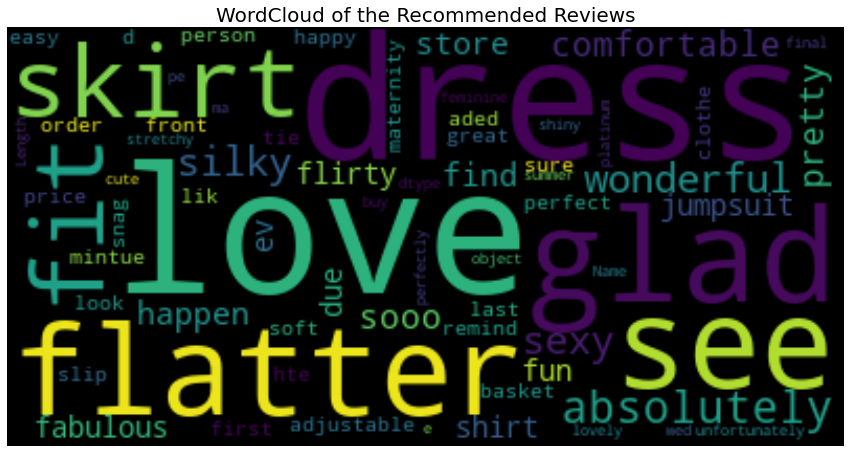

In [24]:
data_recommended = data[data['Recommended IND'] == 1]  # Dataframe that only includes recommended reviews
data_not_recommended = data[data['Recommended IND'] == 0]  # # Dataframe that only includes not recommended reviews

WordCloud_recommended = WordCloud(max_words=500,
                                  random_state=30,
                                  collocations=True).generate(str((data_recommended['final'])))

plt.figure(figsize=(15, 8))
plt.imshow(WordCloud_recommended, interpolation='bilinear')
plt.title('WordCloud of the Recommended Reviews', fontsize=20)
plt.axis("off")
plt.show()

In [25]:
FreqOfWords = data_recommended['final'].str.split(expand=True).stack().value_counts()
FreqOfWords_top200 = FreqOfWords[:200]

fig = px.treemap(FreqOfWords_top200, path=[FreqOfWords_top200.index], values=0)
fig.update_layout(title_text='Top Frequent 200 Words in the Recommended Reviews',
                  title_x=0.5, title_font=dict(size=20)
                  )
fig.update_traces(textinfo="label+value")
fig.show()

# WordCloud of the Not Recommended Reviews

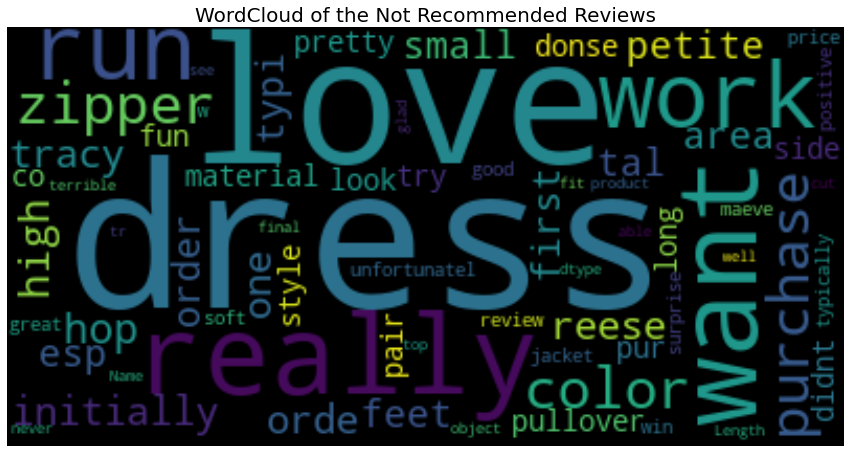

In [26]:
WordCloud_not_recommended = WordCloud(max_words=500,
                                      random_state=30,
                                      collocations=True).generate(str((data_not_recommended['final'])))

plt.figure(figsize=(15, 8))
plt.imshow(WordCloud_not_recommended, interpolation='bilinear')
plt.title('WordCloud of the Not Recommended Reviews', fontsize=20)
plt.axis("off")
plt.show()

In [27]:
FreqOfWords = data_not_recommended['final'].str.split(expand=True).stack().value_counts()
FreqOfWords_top200 = FreqOfWords[:200]

fig = px.treemap(FreqOfWords_top200, path=[FreqOfWords_top200.index], values=0)
fig.update_layout(title_text='Top Frequent 200 Words in the Not Recommended Reviews',
                  title_x=0.5, title_font=dict(size=20)
                  )
fig.update_traces(textinfo="label+value")
fig.show()

# Distribution of the Length of the Texts after Cleaning

In [28]:
data['length_of_text'] = [len(i.split(' ')) for i in data['final']]
fig = px.histogram(data['length_of_text'], marginal='box',
                   labels={"value": "Length of the Text",
                           "color": 'Recommended?'},
                   color=data['Recommended IND'])

fig.update_traces(marker=dict(line=dict(color='#000000', width=2)))
fig.update_layout(title_text='Distribution of the Length of the Texts after Cleaning',
                  title_x=0.5, title_font=dict(size=20))
fig.update_layout(barmode='overlay')
fig.show()

# Train-Test-Validation Split


In [29]:
# I will only use Text data to predict Recommendation
y = data['Recommended IND']
X = data['final']

X.head()

0          absolutely wonderful silky sexy comfortable
1    love dress sooo pretty happen find store glad ...
2    high hop dress really want work initially orde...
3    love love love jumpsuit fun flirty fabulous ev...
4    shirt flatter due adjustable front tie perfect...
Name: final, dtype: object

In [30]:
# Train-Test-Validation Split
x, X_test, y, y_test = train_test_split(X, y, test_size=0.2, random_state=13)  # Test: %20

X_train, X_val, y_train, y_val = train_test_split(x, y, test_size=0.25, random_state=13)  # Val: %20

print('Shape of the X_train:', X_train.shape)
print('Shape of the X_test:', X_test.shape)
print('Shape of the X_val:', X_val.shape)
print('--'*20)
print('Shape of the y_train:', y_train.shape)
print('Shape of the y_test:', y_test.shape)
print('Shape of the y_val:', y_val.shape)

Shape of the X_train: (13576,)
Shape of the X_test: (4526,)
Shape of the X_val: (4526,)
----------------------------------------
Shape of the y_train: (13576,)
Shape of the y_test: (4526,)
Shape of the y_val: (4526,)


# Tokenizing with Tensorflow


In [31]:
num_words = 10000
tokenizer = Tokenizer(num_words=num_words, oov_token='<OOV>')
tokenizer.fit_on_texts(X_train)

Tokenized_train = tokenizer.texts_to_sequences(X_train)
Tokenized_val = tokenizer.texts_to_sequences(X_val)

print('Non-tokenized Version: ', X_train[0])
print('Tokenized Version: ', tokenizer.texts_to_sequences([X_train[0]]))
print('--'*20)
print('Non-tokenized Version: ', X_train[80])
print('Tokenized Version: ', tokenizer.texts_to_sequences([X_train[80]]))

Non-tokenized Version:  absolutely wonderful silky sexy comfortable
Tokenized Version:  [[161, 366, 748, 445, 33]]
----------------------------------------
Non-tokenized Version:  usually petite since dress not come petites try fit lbs dress hit knee hem bite not overwhelm dress look stun great vibrant color dark hair make classic elegant dress look contemporary stylish try store salesperson others happen see rave tell grab glad plan wear spring daughte
Tokenized Version:  [[61, 47, 150, 2, 7, 109, 769, 23, 3, 68, 2, 146, 269, 223, 38, 7, 746, 2, 8, 397, 12, 356, 11, 278, 1025, 18, 342, 459, 2, 8, 2151, 344, 23, 57, 1885, 350, 601, 62, 1723, 432, 631, 218, 313, 6, 212, 6315]]


# Padding the Datasets


In [32]:
maxlen = 50
Padded_train = pad_sequences(Tokenized_train, maxlen=maxlen, padding='pre')
Padded_val = pad_sequences(Tokenized_val, maxlen=maxlen, padding='pre')

# <center> ANN Model Creation


In [33]:
# Creating the Model
model = Sequential()

model.add(Embedding(num_words, 16, input_length=maxlen))
model.add(Dropout(0.2))

model.add(GlobalAvgPool1D())
model.add(Dropout(0.5))

model.add(Dense(1, activation='sigmoid'))

opt = tf.optimizers.Adam(lr=0.55e-3)  # Learning Rate

model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 50, 16)            160000    
_________________________________________________________________
dropout (Dropout)            (None, 50, 16)            0         
_________________________________________________________________
global_average_pooling1d (Gl (None, 16)                0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense (Dense)                (None, 1)                 17        
Total params: 160,017
Trainable params: 160,017
Non-trainable params: 0
_________________________________________________________________


In [34]:
# Training the Model
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', mode='auto', patience=5,
                                                  restore_best_weights=True)

epochs = 100
hist = model.fit(Padded_train, y_train, epochs=epochs,
                 validation_data=(Padded_val, y_val),
                 callbacks=[early_stopping], batch_size=32)

Epoch 1/100
425/425 [==============================] - 2s 4ms/step - loss: 0.6326 - accuracy: 0.7442 - val_loss: 0.4718 - val_accuracy: 0.8239
Epoch 2/100
425/425 [==============================] - 1s 3ms/step - loss: 0.4799 - accuracy: 0.8133 - val_loss: 0.4417 - val_accuracy: 0.8239
Epoch 3/100
425/425 [==============================] - 1s 3ms/step - loss: 0.4550 - accuracy: 0.8200 - val_loss: 0.4263 - val_accuracy: 0.8239
Epoch 4/100
425/425 [==============================] - 1s 3ms/step - loss: 0.4334 - accuracy: 0.8211 - val_loss: 0.4103 - val_accuracy: 0.8239
Epoch 5/100
425/425 [==============================] - 1s 3ms/step - loss: 0.4240 - accuracy: 0.8158 - val_loss: 0.3929 - val_accuracy: 0.8241
Epoch 6/100
425/425 [==============================] - 1s 3ms/step - loss: 0.3991 - accuracy: 0.8207 - val_loss: 0.3745 - val_accuracy: 0.8250
Epoch 7/100
425/425 [==============================] - 1s 3ms/step - loss: 0.3806 - accuracy: 0.8198 - val_loss: 0.3546 - val_accuracy: 0.8303

# Train and Validation Loss Graphs


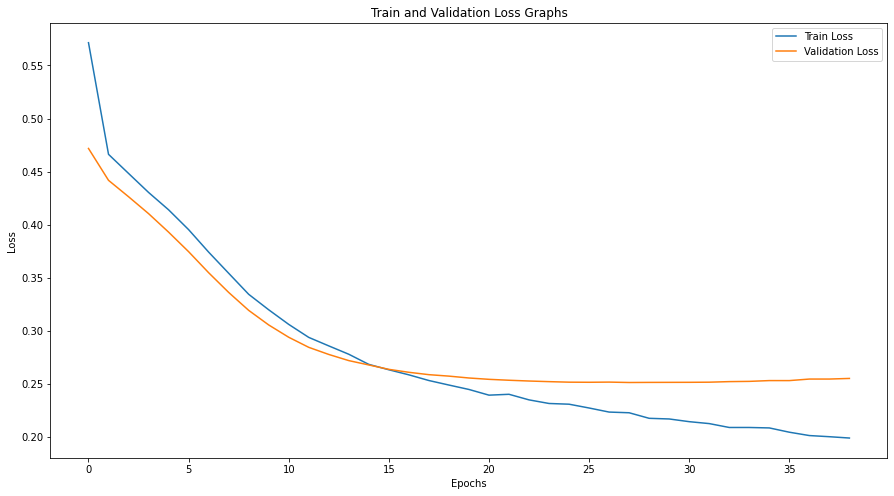

In [35]:
plt.figure(figsize=(15, 8))
plt.plot(hist.history['loss'], label='Train Loss')
plt.plot(hist.history['val_loss'], label='Validation Loss')
plt.title('Train and Validation Loss Graphs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Train and Validation Accuracy Graphs

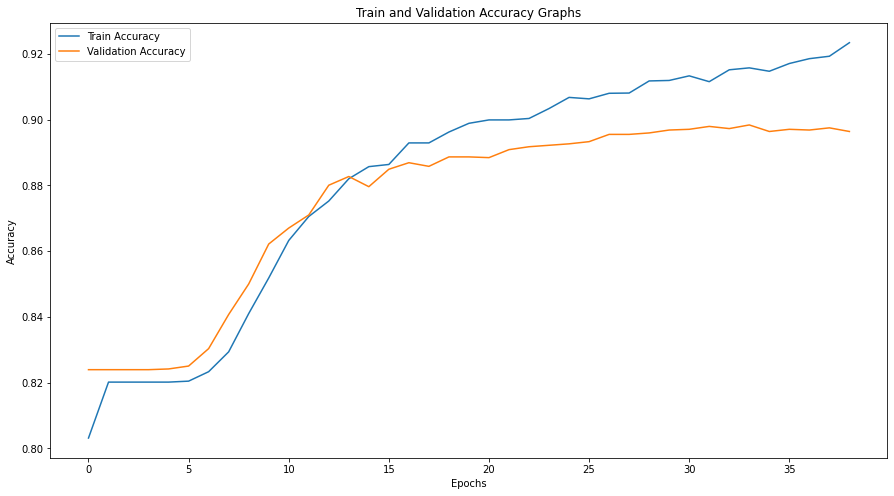

In [36]:
plt.figure(figsize=(15, 8))
plt.plot(hist.history['accuracy'], label='Train Accuracy')
plt.plot(hist.history['val_accuracy'], label='Validation Accuracy')
plt.title('Train and Validation Accuracy Graphs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Preparing the Test Data


In [37]:
X_test = X_test.apply(tokenization)
X_test = X_test.apply(stopwords_remove)
X_test = X_test.apply(lemmatization)
X_test = X_test.str.join(' ')

X_test.head()

10818                              low waisted weird liner
779      shirt not good look gal hips fit top tight ord...
10907    love dress long enough dramatic graze feet wit...
17442    understand pencil skirt gon body hug however r...
832      order shirt wear pair pant return one reason t...
Name: final, dtype: object

In [38]:
Tokenized_test = tokenizer.texts_to_sequences(X_test)
Padded_test = pad_sequences(Tokenized_test, maxlen=maxlen, padding='pre')

test_evaluate = model.evaluate(Padded_test, y_test)

142/142 [==============================] - 0s 724us/step - loss: 0.2692 - accuracy: 0.8860


# Confusion Matrix of the Test Data

In [39]:
pred_train_lstm = model.predict(Padded_train)
pred_test_lstm = model.predict(Padded_test)

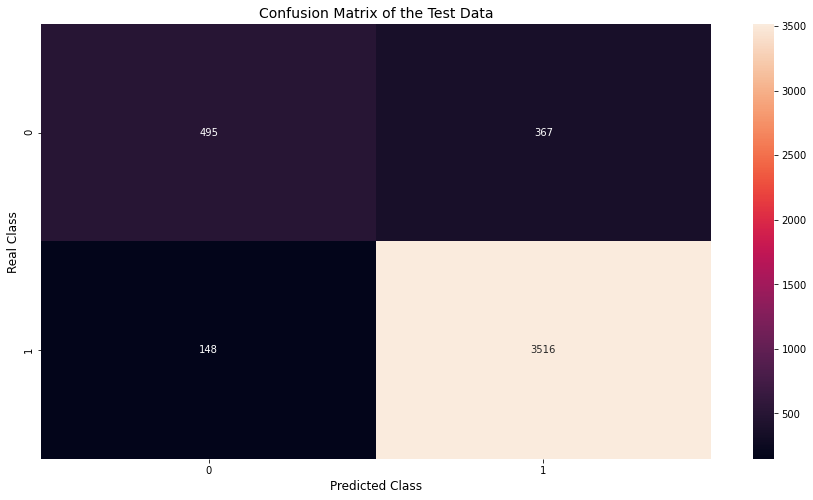

In [40]:
for i, x in enumerate(pred_test_lstm):
    if 0 <= x < 0.49:
        pred_test_lstm[i] = 0
    else:
        pred_test_lstm[i] = 1

for i, x in enumerate(pred_train_lstm):
    if 0 <= x < 0.49:
        pred_train_lstm[i] = 0
    else:
        pred_train_lstm[i] = 1

conf_mat = confusion_matrix(y_true=y_test, y_pred=pred_test_lstm)
plt.figure(figsize=(15, 8))
sns.heatmap(conf_mat, annot=True, fmt='g')
plt.title('Confusion Matrix of the Test Data', fontsize=14)
plt.ylabel('Real Class', fontsize=12)
plt.xlabel('Predicted Class', fontsize=12)
plt.show()

# Evaluation Metrics of the LSTM Model

In [41]:
# Accuracy
train_acc_lstm = round(accuracy_score(y_train, pred_train_lstm) * 100, 2)
print('Train Accuracy of the LSTM: %', train_acc_lstm)
test_acc_lstm = round(accuracy_score(y_test, pred_test_lstm) * 100, 2)
print('Test Accuracy of the LSTM: %', test_acc_lstm)
print('--' * 20)

# Precision
train_precision_lstm = round(precision_score(y_train, pred_train_lstm) * 100, 2)
print('Train Precision of the LSTM: %', train_precision_lstm)
precision_lstm = round(precision_score(y_test, pred_test_lstm) * 100, 2)
print('Test Precision of the LSTM: %', precision_lstm)
print('--' * 20)

# Recall
train_recall_lstm = round(recall_score(y_train, pred_train_lstm) * 100, 2)
print('Train Recall of the LSTM: %', train_recall_lstm)
recall_lstm = round(recall_score(y_test, pred_test_lstm) * 100, 2)
print('Test Recall of the LSTM: %', recall_lstm)

Train Accuracy of the LSTM: % 91.85
Test Accuracy of the LSTM: % 88.62
----------------------------------------
Train Precision of the LSTM: % 93.27
Test Precision of the LSTM: % 90.55
----------------------------------------
Train Recall of the LSTM: % 97.06
Test Recall of the LSTM: % 95.96


# Having Fun with the LSTM Model

In [42]:
def predict_recommendation(input_text):  # The function for doing all the previous steps
    input_text = input_text.lower()
    input_text = re.sub(r'[^a-zA-Z]', ' ', input_text)
    input_text = tokenization(input_text)
    input_text = stopwords_remove(input_text)
    input_text = lemmatization(input_text)
    input_text = ' '.join(input_text)
    input_text = tokenizer.texts_to_sequences([input_text])
    input_text = pad_sequences(input_text, maxlen=maxlen, padding='pre')
    input_text = model.predict(input_text)
    if input_text >= 0.5:
        input_text = f'Recommended with %{round(float(input_text*100), 2)}'
    else:
        input_text = f'Not Recommended with %{round(float(input_text*100), 2)}'

    return print(input_text)

In [43]:
# This reviews above are taken from several websites for testing the model with real world data. You can find these websites in the Ref.5
predict_recommendation("The clothes are such poor quality and look nothing like they do on the website. I order 2 packages of fast fashion a year just as a treat, and I sorely regret buying from here. Fabrics are cheaper than what they charge, their seems to be no thought of sizing consitency and so on")

Not Recommended with %20.37


In [44]:
predict_recommendation("Beautiful colour of lemon great fit and length here in three days all l need is some fine weather to show if at it's best!!!!!")

Recommended with %95.61


In [45]:
predict_recommendation("As usual the clothes I ordered arrived quickly and were all a good fit, except for yoga pants , had to cit 4 ins off them but they are lovely pants. I shall wait for my next pay day!!")

Recommended with %84.52


In [46]:
predict_recommendation("I should've checked reviews before ordering... each item they sent was much worse quality in person than how it appeared online, and one of the dresses looked NOTHING in person what they said it was! I even double-checked to make sure they didn't accidentally send me the wrong item. see photos below.")

Not Recommended with %3.28


In [47]:
predict_recommendation("cheap material that falls apart in seconds. Clothes look nothing like the pictures. I bought the chunky heeled shoes they broke after two times of wearing them.")

Not Recommended with %22.07


In [48]:
predict_recommendation("Very fast dispatch and delivery. Clothes are always a consistent fit, good quality and well priced. Couldn't ask for more! Will be using again and would happily recommend.")

Recommended with %90.0


In [49]:
predict_recommendation("I have no complaints whatsoever, from ordering to getting my goods were excellent , down to the garments themselves, was as good as you see them on the website, I have shopped on here a few times and not disappointed at all, the only problem I have is that some trousers are a bit slim on leg and because I am a below knee amputee I have difficulty getting the right fit, otherwise very happy indeed.")

Recommended with %93.45


In [50]:
predict_recommendation("My dress had blue ink and biro stains on which was a real shame. I needed it for an outfit so had to put up with it but I'm not sure I'll order online again.")

Not Recommended with %45.49


In [51]:
# Ref. 6 from now on
predict_recommendation("Sizes varied despite allegedly being the same size. Some of the quality was poor. I had to send most of my order back (including the jeans I didn't order) Usually I get good stuff from Yours, so I was disappointed")

Not Recommended with %18.72


In [52]:
predict_recommendation("I do really like yours clothing, just find the sizing is slightly off, a normal standard tshirt always seems too long and everything has dipped hems, doesn't look good when you're only short.")

Recommended with %88.78


In [53]:
predict_recommendation("I really love this dress. I ordered a large and it fits perfectly. There’s about 1/2” that touches the ground, which could easily be fixed with a pair of wedges. The cut is flattering, flowing and hides my mom belly. I am bottom heavy and this dress accommodated everything just fine. It shows just a bit of cleavage and just a bit of knee. The fabric doesn’t seem to need a slip. It gets a good breeze and looks pretty when you walk because of the ruffles. The color matched the picture exactly. If you’re considering this dress, I say, yes, buy it!")

Recommended with %99.81


In [54]:
predict_recommendation("I don't like writing negative reviews but this one pissed me off the second I pulled it out of the package. The fabric is the thinnest, cheapest crap I've ever seen used on a garment. None of the seams are finished properly with the seams visible on all the edges (see pictures for reference.) I just can't believe they're charging nearly $40 for this crap! I promptly returned it.")

Not Recommended with %2.37


In [55]:
predict_recommendation("The cheapest material I've ever seen. It was like someone wove paper napkins from the dollar store together to make a dress. It felt like if the fabric ever got wet it would disintegrate. Ordered the royal blue color but the dress was actually purple. The cut was flattering. Shame that was the only good thing.")

Not Recommended with %18.94


In [56]:
# Ref. 7 from now on
predict_recommendation("I was so excited to receive this dress in the mail! The first day I wore it, I received so many compliments. The fit was true to size. I ordered an XS. Height 5'5, Weight 118, Bust 34B with an overall athletic build. I had no issues with the top of the dress as most of the review stated. If anything, I would suggest a pin. I would have rated this dress 5 stars however, I did have the side strap that holds the belt, break on the first day. I sowed it back into place but with the straps were a little more durable. Other than that, I love it!")

Recommended with %92.92


In [57]:
predict_recommendation("The dress does not look like the dress pictures. The material seems cheaper and this does not fit well. It’s way too big. I requested to return for a refund and now I have to pay to ship it back as well. If I could give zero stars I would. Would not recommend.")

Not Recommended with %2.78


In [58]:
predict_recommendation("I love this item it's was not dark blue like the picture but i love i it's very comfortable always wanted one I taken pics in side out to show the cord you can adjust also colour i would recommend this to anyone can we're all around the house also great to sleep in can not wait for my other two to arrive")

Recommended with %80.73


In [59]:
predict_recommendation("This kaftan is NOT a silky material at all, it is a slightly transparent and dull cotton material. It is NOT as bright nor pretty as in the picture, it's more of a navy colour. When it arrived it looked worn, not ironed and had 2 small patches of damage, like someone had tried it on and maybe some jewellery had gotten stuck upon the material which then had been pulled off. I have included a picture of the damage that I took on my phone.")

Not Recommended with %5.5


**I would love to have your feedbacks and suggestions. Please leave your comments about data preprocessing steps, learning curves and final evaluation resuls!**

# References

[1] https://medium.com/analytics-vidhya/text-preprocessing-for-nlp-natural-language-processing-beginners-to-master-fd82dfecf95

[2] https://stackabuse.com/removing-stop-words-from-strings-in-python/

[3] https://www.geeksforgeeks.org/python-lemmatization-with-nltk/

[4] https://www.kaggle.com/rmisra/news-headlines-dataset-for-sarcasm-detection

[5] https://uk.trustpilot.com/review/www.yoursclothing.co.uk?stars=4

[6] https://www.amazon.co.uk/product-reviews/B08FYWYMVL/ref=cm_cr_unknown?ie=UTF8&filterByStar=four_star&reviewerType=all_reviews&pageNumber=1#reviews-filter-bar

[7] https://www.amazon.co.uk/product-reviews/B014R7EZT8/ref=cm_cr_getr_d_paging_btm_next_5?ie=UTF8&filterByStar=one_star&reviewerType=all_reviews&pageNumber=5#reviews-filter-bar